# Importing Libraires

In [ ]:
# Tensorflow installation
!pip install tensorflow==2.3.0 -q

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# Libraries importation
import os # operating system interfaces
from os.path import join
from glob import glob
import numpy as np # scientific computing
import pandas as pd # data analysis
import tensorflow as tf
# from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt # plots
import PIL # image files manipulation
import random

# callback to reduce learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

# opencv to handle images (https://opencv.org/releases/)
import cv2 as cv

# print metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, \
    confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.10.0


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # automatic paralleling computing
BATCH_SIZE = 32 * strategy.num_replicas_in_sync
IMAGE_SIZE = [176, 176]
EPOCHS = 50 # reduced from 100 because of no significant improvement after 50th epoch

In [13]:
data_folder = "dataset"

## images NonDemented
df_NonDemented_imgs = pd.DataFrame({
    "X": sorted(glob(join(data_folder, "NonDemented", "*"))),
    "y": 0,
    "class": "NonDementia"
})
shuffled_non = df_NonDemented_imgs.sample(frac=1)
testsize_non = int(0.2 * len(shuffled_non))
# Test
non_test = shuffled_non[:testsize_non]
# Train and validation
non_trainval = shuffled_non[testsize_non:]
trainsize_non = int(0.8 * len(non_trainval))
# Train
shuffled_non_train = non_trainval[:trainsize_non]
#Validation
shuffled_non_val = non_trainval[trainsize_non:]


## images VeryMildDemented
df_VeryMildDemented_imgs = pd.DataFrame({
    "X": sorted(glob(join(data_folder, "VeryMildDemented", "*"))),
    "y": 1,
    "class": "VeryMildDementia"
})
shuffled_verymild = df_VeryMildDemented_imgs.sample(frac=1)
testsize_verymild = int(0.2 * len(shuffled_verymild))

# Test
verymild_test = shuffled_verymild[:testsize_verymild]

# Train and validation
verymild_trainval = shuffled_verymild[testsize_verymild:]
trainsize_verymild = int(0.8 * len(verymild_trainval))

# Train
shuffled_verymild_train = verymild_trainval[:trainsize_verymild]

#Validation
shuffled_verymild_val = verymild_trainval[trainsize_verymild:]


## images MildDemented
df_MildDemented_imgs = pd.DataFrame({
    "X": sorted(glob(join(data_folder, "MildDemented", "*"))),
    "y": 2,
    "class": "MildDementia"
})
shuffled_mild = df_MildDemented_imgs.sample(frac=1)
testsize_mild = int(0.2 * len(shuffled_mild))

# Test
mild_test = shuffled_mild[:testsize_mild]

# Train and validation
mild_trainval = shuffled_mild[testsize_mild:]
trainsize_mild = int(0.8 * len(mild_trainval))

# Train
shuffled_mild_train = mild_trainval[:trainsize_mild]

#Validation
shuffled_mild_val = mild_trainval[trainsize_mild:]

## images ModerateDemented
df_ModerateDemented_imgs = pd.DataFrame({
    "X": sorted(glob(join(data_folder, "ModerateDemented", "*"))),
    "y": 3,
    "class": "ModerateDementia"
})
shuffled_moderate = df_ModerateDemented_imgs.sample(frac=1)
testsize_moderate = int(0.2 * len(shuffled_moderate))

# Test
moderate_test = shuffled_moderate[:testsize_moderate]

# Train and validation
moderate_trainval = shuffled_moderate[testsize_moderate:]
trainsize_moderate = int(0.8 * len(moderate_trainval))

# Train
shuffled_moderate_train = moderate_trainval[:trainsize_moderate]

#Validation
shuffled_moderate_val = moderate_trainval[trainsize_moderate:]


## Number of images
print("TOTAL:")
print("# of images with NonDemented Alzheimer =", len(shuffled_non))
print("# of images with VeryMildDemented Alzheimer =", len(shuffled_verymild))
print("# of images with MildDemented Alzheimer =", len(shuffled_mild))
print("# of images with ModerateDemented Alzheimer =", len(shuffled_moderate))
print("------------")
print("\nTest:")
print("# of images with NonDemented Alzheimer =", len(non_test))
print("# of images with VeryMildDemented Alzheimer =", len(verymild_test))
print("# of images with MildDemented Alzheimer =", len(mild_test))
print("# of images with ModerateDemented Alzheimer =", len(moderate_test))
print("------------")
print("\nTraining:")
print("# of images with NonDemented Alzheimer =", len(shuffled_non_train))
print("# of images with VeryMildDemented Alzheimer =", len(shuffled_verymild_train))
print("# of images with MildDemented Alzheimer =", len(shuffled_mild_train))
print("# of images with ModerateDemented Alzheimer =", len(shuffled_moderate_train))
print("------------")
print("\nValidation:")
print("# of images with NonDemented Alzheimer =", len(shuffled_non_val))
print("# of images with VeryMildDemented Alzheimer =", len(shuffled_verymild_val))
print("# of images with MildDemented Alzheimer =", len(shuffled_mild_val))
print("# of images with ModerateDemented Alzheimer =", len(shuffled_moderate_val))

TOTAL:
# of images with NonDemented Alzheimer = 2240
# of images with VeryMildDemented Alzheimer = 1568
# of images with MildDemented Alzheimer = 627
# of images with ModerateDemented Alzheimer = 44
------------

Test:
# of images with NonDemented Alzheimer = 448
# of images with VeryMildDemented Alzheimer = 313
# of images with MildDemented Alzheimer = 125
# of images with ModerateDemented Alzheimer = 8
------------

Training:
# of images with NonDemented Alzheimer = 1433
# of images with VeryMildDemented Alzheimer = 1004
# of images with MildDemented Alzheimer = 401
# of images with ModerateDemented Alzheimer = 28
------------

Validation:
# of images with NonDemented Alzheimer = 359
# of images with VeryMildDemented Alzheimer = 251
# of images with MildDemented Alzheimer = 101
# of images with ModerateDemented Alzheimer = 8


> **Show Class Imbalance**
>
> In this additional part, we hightlighted once again the unbalance between the images contained in the four classes, a stumbling block to overcome in order to make the model more accurate. Here, an histogram plot of the length of the four classes objects vector is shown.

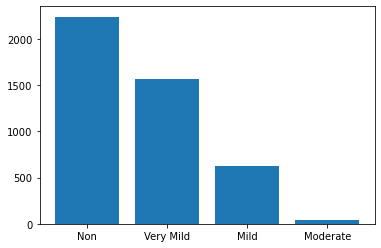

In [14]:
# show class imbalance in the dataset

heights = [len(shuffled_non), len(shuffled_verymild), len(shuffled_mild), len(shuffled_moderate)]

fig, ax = plt.subplots()
height = heights
bars = ('Non', 'Very Mild', 'Mild', 'Moderate')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

# Feature Engineering

In this section, the images are loaded and training, validation and test sets "ready" to be given to the layers are created.

**Defining functions to load the images and to perform one-hot encoding**

1. **load_image method** is defined in order to read the paths and load the images directly from their paths, created in the previous section. The final output of the method is, for each path, the image in grey scale, resized by the parameters defined previously, thus ready to enter into the first layer of the neural network.

2. **hot_array** method performs the one hot encoding, generating four normal versors to identify the four classes

In [15]:
def load_image(fname):
    """
    Load an image using opencv given its path.
    """
    # img is a numpy array
    img = cv.imread(fname)
    # opencv uses BGR channel order by default
    # so convert to RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # resize image
    resize = (IMAGE_SIZE[0], IMAGE_SIZE[1])
    img = cv.resize(img, resize)
    return img

def hot_array(class_number):
    ha = [0,0,0,0]
    ha[class_number] = 1
    return ha

**Concatenate train set and test set**

Here the final concatenation is done, in order to get a training set composed by images from all the classes. In fact, train_concat contains 80% of the 80% of the total images for each class, bacause the training set was defined from the 80% of the training+validation set. 

Then, another shuffling is done and to the attribute **X**, that contains all the images paths, is applied the above defined method load_image.
Subsequently, also the labels are concatenated and the result is converted into an array. Then, both the images and the labels are stacked into xtrain and ytrain vectors.

The same procedure is followed also for the validation set. Now the vectors containing images and labels are ready, and the most important concept is that both training set and validation set contain the images that, in the original code, were split between training+validation and test set, introducing bias.

In [16]:
## TRAIN SET
# concatenate
train_concat = pd.concat([shuffled_mild_train, shuffled_moderate_train, shuffled_non_train, shuffled_verymild_train])
# shuffle
train_concat = train_concat.sample(frac=1)
# load image
train_concat["X"] = train_concat["X"].apply(load_image)

# extract label before one hot in order to use for class weights
y_train_lab = train_concat["y"]
y_train_lab = np.array(y_train_lab) # convert into a numpy array

# apply one-hot encoding
train_concat["y"] = train_concat["y"].apply(hot_array)

# stack images and labels
xtrain = np.stack(train_concat["X"])
ytrain = np.stack(train_concat["y"])


## VALIDATION SET
val_concat = pd.concat([shuffled_mild_val, shuffled_moderate_val, shuffled_non_val, shuffled_verymild_val])
val_concat = val_concat.sample(frac=1)
val_concat["X"] = val_concat["X"].apply(load_image)
val_concat["y"] = val_concat["y"].apply(hot_array)
xval = np.stack(val_concat["X"])
yval = np.stack(val_concat["y"])

# Visualize the data - 1

This section is intended to visualize some of the images contained in the entire dataset. It is clear that in each class, different sections of the brain MRI image are present.

Text(0, 0.5, 'Moderate Dementia')

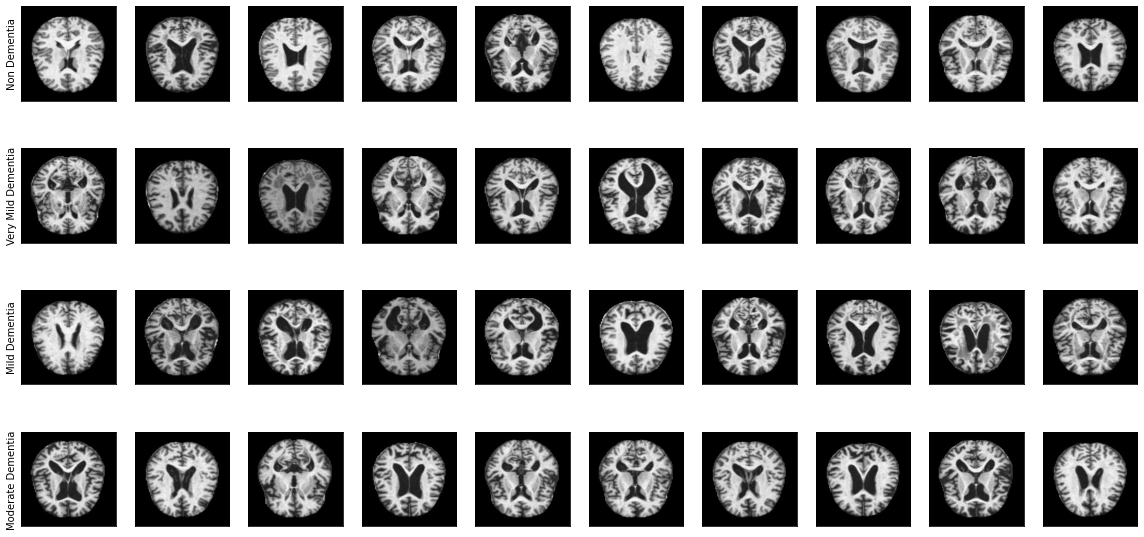

In [17]:
# plot some images per class

ncols = 10

fig, axs = plt.subplots(nrows=4, ncols=ncols, figsize=(20, 10))

for fname,ax in zip(shuffled_non.loc[:ncols, "X"], axs[0,:]):
    im = load_image(fname)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

for fname,ax in zip(shuffled_verymild.loc[:ncols, "X"], axs[1,:]):
    im = load_image(fname)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    
for fname,ax in zip(shuffled_mild.loc[:ncols, "X"], axs[2,:]):
    im = load_image(fname)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

for fname,ax in zip(shuffled_moderate.loc[:ncols, "X"], axs[3,:]):
    im = load_image(fname)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

axs[0,0].set_ylabel("Non Dementia")
axs[1,0].set_ylabel("Very Mild Dementia")
axs[2,0].set_ylabel("Mild Dementia")
axs[3,0].set_ylabel("Moderate Dementia")

# Build the Model - 1

In these lines of code, the model is built, assembling the different layers.

1. **conv_block** method is defined using **Sequential** method provided by Keras library. In particular, in this convolutional block, two separable 2D convolutions are performed, in order to save computational power. We adjusted the activation function from **relu** to **elu**, since it is more effective in convolutional NN that analyse images. Then a Batch Normalization and a Max Pooling 2D layers are added to the block.

2. **dense_block** method is defined to build the fully connected block, adding a Dense layer (always with **elu** activation function), a Batch Normalization layer and a Dropout layer, useful to black out some network nodes at a rate defined by the argument **dropout_rate**

3. The actual model is defined in the method **build_model**:
   * **Sequential** method provided by Keras is used to add the layers
   * Firstly, the input layer is defined, as an image with size decided at the beginning of the code
   * Then, two 2D separable convolutions are added (always with **elu** activation function), before the Max Pooling 2D layer
   * Subsequently, three conv_block with increasing number of filters (32, 64, 128) are applied before a Dropout layer
   * Another conv_block (with 256 filters) is applied, then another Dropout and a Flatten layer
   * Three dense_block (512, 128, 64 units) and a Dense layer conclude the architecture of the model
   
We believed that the model, built in this way, was perfect for our scope and we did not modify the architecture. We tried to add/remove some convolutional and dense blocks but the performance of the model decreased or did not have visible improvements.

In [18]:
# Convolutional Block
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='elu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='elu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

# Dense Block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

# Function to build the model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='elu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='elu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    return model

# Deciding a Metric

The imbalance between the number of images in each class prevent us from using accuracy. ROC AUC has been used instead. In addition, the ADAM optimizer with initial learning rate of 0.001 and the Cross Entropy Loss have been defined respectively as optimizer and cost function. The build_model method is called and the model is defined as object.

In [19]:
with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.AUC(name='auc')]
    
    model.compile(
        # choose Adam as the optimizer with initial learning rate = 0.001
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

# Training the Model - CNN

This passage contains the use of the following functions provided by Keras to set some parameters of the training:

1. **ModelCheckpoint** in order to save the best result of the model during the iterations and to prevent losing the running data
2. **EarlyStopping** in order to stop the training if similar results are achieved for a number X of subsequent epochs (patience)
3. **ReduceLROnPlateau** in order to reduce the learning rate when the model is not improving in subsequent iterations

The weights for the classes are also defined, giving more importance to the class with less data (i.e. Moderate Dementia). This parameter is then used in the model fitting.

The function **fit** takes as arguments both hyperparameters and parameters, in addition to the callbacks, the class weights and the dataset of training and validation (images and labels). Once this method is called, the training of the model starts, for a number of epochs < 50, as set in the very beginning of the code.

The argument class_weights is what we adopted to solve the problem of unbalanced datasets. In particular, we tried to perform data augmentation for the class that contains only 64 images, both in terms of flip/rotation/cut and contrast/brightness/grey scale.
This procedure gave poor results, looking at the general performance: this was because the model is built to recognize images (test set) that are in the same format (size/contrast/angles) of the ones used in the training set, so that a transformation of the images does not have a good impact on the final evaluation on the test set.

Text(0, 0.5, 'lr')

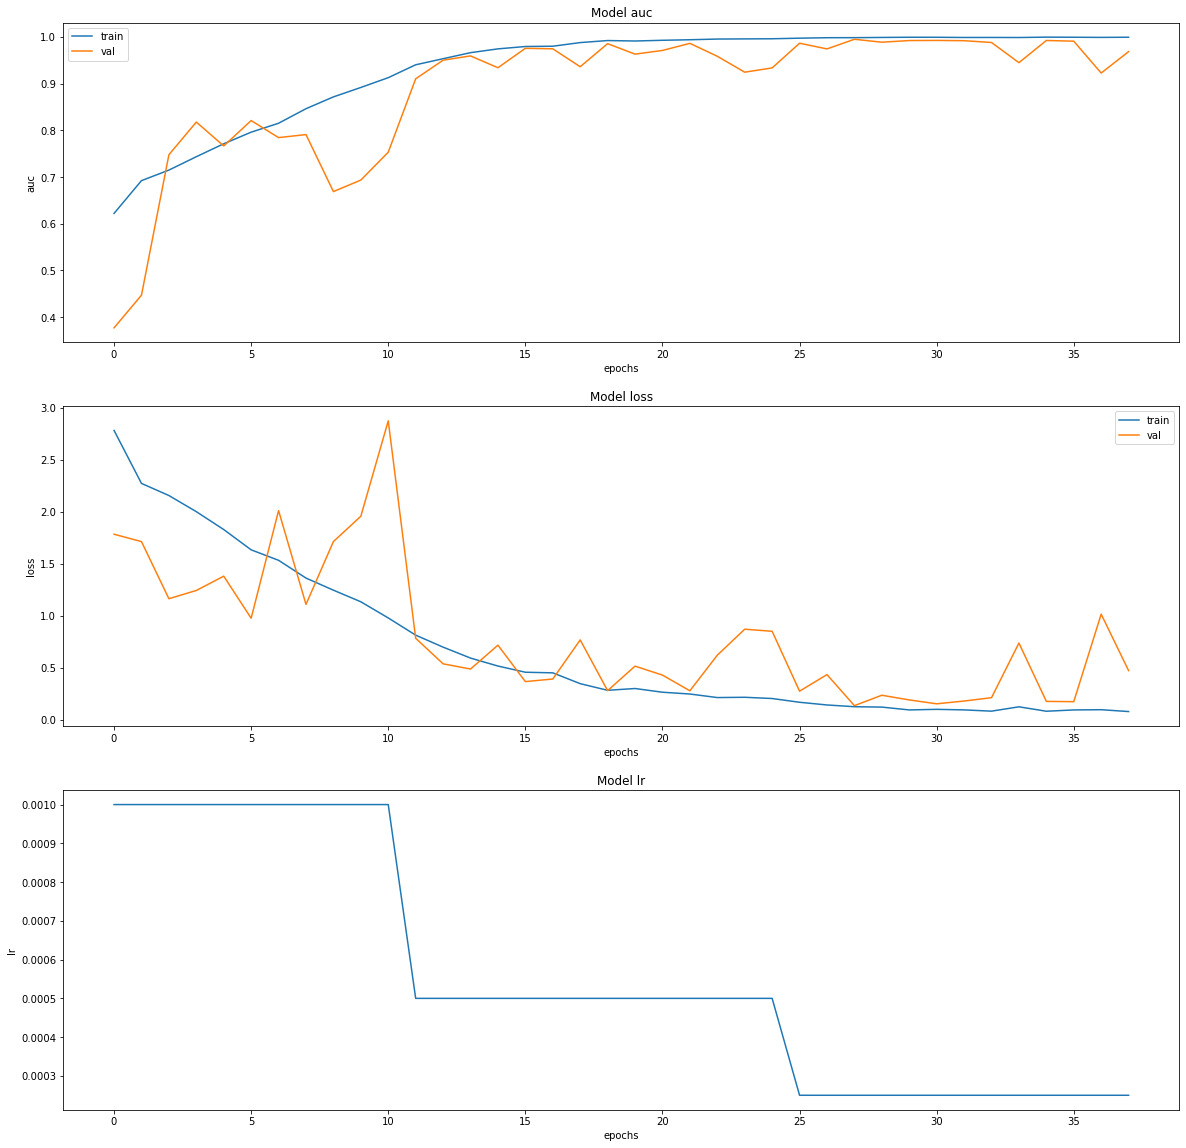

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

ax[2].plot(history.history['lr'])
ax[2].set_title('Model lr')
ax[2].set_xlabel('epochs')
ax[2].set_ylabel('lr')

# Evaluate the Model - 1

In this section, the model evaluates the data previously saved in the test set. Firstly, the same procedure of concatenation done before for training and validation set is followed, in order to get two vectors of objects **xtest** and **ytest** necessary to evaluate the model. The evaluation uses the method **evaluate**.
The loss function and the AUC show excellent values.

In [13]:
## TEST SET
test_concat = pd.concat([mild_test, moderate_test, non_test, verymild_test])
test_concat = test_concat.sample(frac=1)
test_concat["X"] = test_concat["X"].apply(load_image)
test_concat["y"] = test_concat["y"].apply(hot_array)
xtest = np.stack(val_concat["X"])
ytest = np.stack(val_concat["y"])

In [14]:
# evaluation
_ = model.evaluate(xtest,ytest)

33/33 [==============================] - 0s 13ms/step - loss: 0.1340 - auc: 0.9948


**Print Metrics**

This code fragment was added by looking at a Notebook presented in a lecture and it is useful to build and evaluate the confusion matrix of the model.

In [15]:
# Function from Federico Agostini notebooks (slightly modified)

def print_metrics(model, X, y, cm_labels="auto"):
    """
    Print the following metrics: accuracy, balanced accuracy, precision, recall, f1.
    If the model is able to predict probabilities, also auc is calculated.
    Moreover, the confusion matrix is plotted.

    Parameters
    ----------
    model : sklearn estimator
        Sklearn estimator or similar which implements the method `predict`
        and optionally `predict_proba`.
    X : array like
        Input features.
    y : array like
        Target labels.
    cm_labels : list [default="auto"]
        Optional labels to be used in the confusion matrix.

    Returns
    -------
    metrics : dict
        Dictionary with the calculated metrics.

    """
    y_pred = model.predict(X)
    y_pred = np.squeeze(y_pred)
    y_pred = np.argmax(y_pred,1).astype(int)

    metrics = {
        "Accuracy"    : accuracy_score(y, y_pred),
        "Bal Accuracy": balanced_accuracy_score(y, y_pred),
        "Precision"   : precision_score(y, y_pred, average="macro"),
        "Recall"      : recall_score(y, y_pred, average="macro"),
        "f1"          : f1_score(y, y_pred, average="macro")
    }
    # add AUC if the classifier is able to predict probabilities
    try:
        y_pred_proba = model.predict_proba(X)
        metrics["AUC"] = roc_auc_score(y, y_pred_proba, multi_class="ovr", average="macro")
    except:
        metrics["AUC"] = np.nan
    
    for k,v in metrics.items():
        print("{:12s} = {}".format(k,v))  
    print("\n")
    
    # confusion matrix
    cm = confusion_matrix(y, y_pred, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, ax=ax, square=True, vmin=0, vmax=1, annot=True, 
                linewidths=.05, fmt=".2f", cbar_kws={"shrink":.8}, 
                xticklabels=cm_labels, yticklabels=cm_labels)
    plt.xticks([0.5, 1.5, 2.5, 3.5], ['Non', 'Very Mild', 'Mild', 'Moderate'])
    plt.yticks([0.5, 1.5, 2.5, 3.5], ['Non', 'Very Mild', 'Mild', 'Moderate'])
    ax.set_ylabel("True")
    ax.set_xlabel("Predicted")

    metrics["cm"] = cm

    return metrics

Accuracy     = 0.9610136452241715
Bal Accuracy = 0.972355966854302
Precision    = 0.9723168551571973
Recall       = 0.972355966854302
f1           = 0.9723029538946565
AUC          = 0.9949038380383148




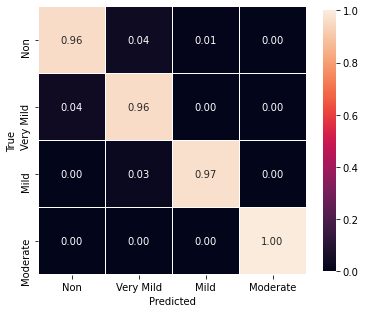

In [16]:
# visualize model metrics
y_test = ytest.argmax(axis=1)
met = print_metrics(model, xtest, y_test)


As we can see, the confusion matrix tells us that the classification performed in the testing set is nearly perfect and the matrix is clearly improved with respect to the original model's one.